In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

In [7]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

In [8]:
results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred)
    })


In [9]:
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:\n")
print(results_df)


Model Comparison Table:

  Model  Train Accuracy  Test Accuracy  Precision    Recall  F1 Score
0   SVM        0.986813       0.973684   0.972222  0.985915  0.979021


<Axes: xlabel='Model'>

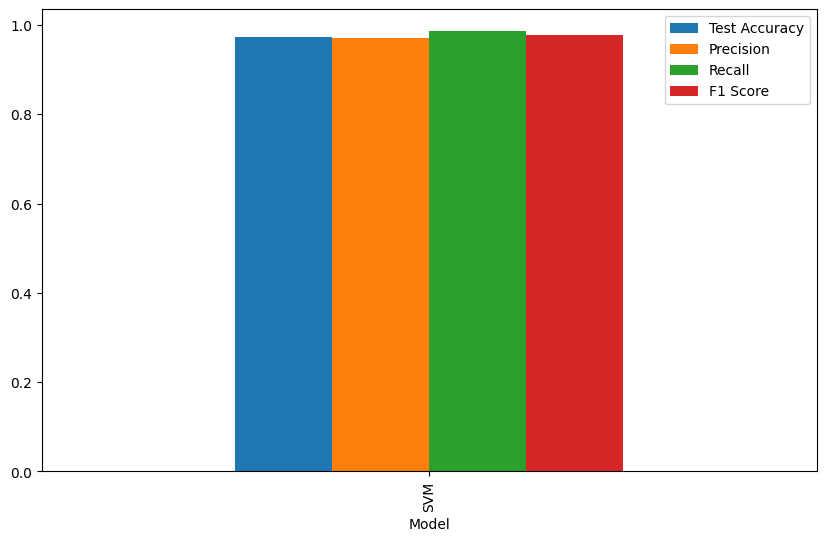

In [10]:
results_df.set_index("Model")[["Test Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind="bar", figsize=(10, 6)
)

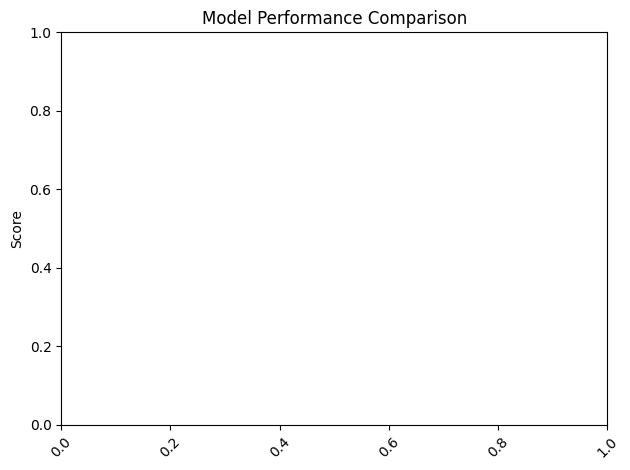

In [11]:
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
best_model_name = results_df.sort_values(by="Test Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest Model Selected: {best_model_name}")


Best Model Selected: SVM


In [13]:
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Best model and scaler saved successfully.")

Best model and scaler saved successfully.
